In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate IV Data Heteroskedastic vs. Homoskedastic

In [2]:
# Sample size for all simulations below
N = 10000

# Parameters
beta_true = 1.0
z_std     = 1.0
v_std     = 1.0
u_std     = 1.0
rho       = 0.99

In [3]:
# Helper function to get OLS coefficient for beta
def get_OLS_coefficient(D, Y):
    beta_hat = (np.linalg.inv(D.T @ D) @ D.T @ Y)[0][0]
    return beta_hat

# Helper function to get TSLS coefficient for beta
def get_TSLS_coefficient(D, Z, Y):
    num   = np.cov(Y.ravel(), Z.ravel())[0,1] 
    denom = np.cov(D.ravel(), Z.ravel())[0,1]
    return num/denom

In [5]:
np.random.seed(5882300)

# Draw instrument and errors
Z        = np.random.normal(0., z_std**2, size=N)[:,None]
V        = np.random.normal(0., v_std**2, size=N)[:,None]
U_homo   = rho*V + np.random.normal(0., u_std**2, size=N)[:,None]
U_hetero = (rho*(Z**2))*V + np.random.normal(0., u_std**2, size=N)[:,None]

# Test out different instrument strengths
gammas     = np.linspace(0.0, 0.5, 5000)
betas_ols  = np.zeros((gammas.shape[0],2))
betas_tsls = np.zeros((gammas.shape[0],2))
for i,gamma_true in enumerate(gammas):

    # Get D and Y given gamma and errors
    D        = gamma_true*Z + V
    Y_homo   = beta_true*D + U_homo
    Y_hetero = beta_true*D + U_hetero

    # Get OLS and TSLS coefficients in each case
    betas_ols[i,0]  = get_OLS_coefficient(D, Y_homo)
    betas_tsls[i,0] = get_TSLS_coefficient(D, Z, Y_homo)
    betas_ols[i,1]  = get_OLS_coefficient(D, Y_hetero)
    betas_tsls[i,1] = get_TSLS_coefficient(D, Z, Y_hetero)

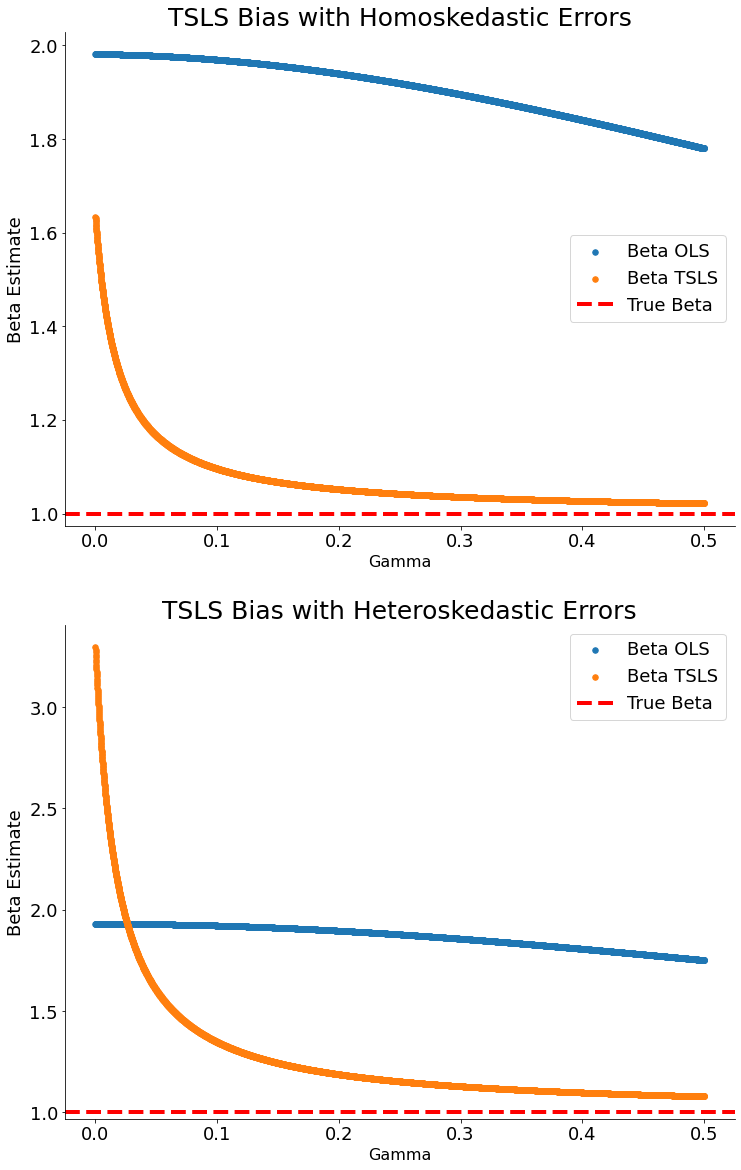

In [8]:
# Formatting stuff
fig,ax = plt.subplots(2, 1, figsize=(12,20))
ax = ax.flatten()

for i,case in enumerate(['Homoskedastic','Heteroskedastic']):
    
    # Formatting
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

    # Do plotting
    ax[i].scatter(gammas, betas_ols[:,i], s=30, label="Beta OLS")
    ax[i].scatter(gammas, betas_tsls[:,i], s=30, label="Beta TSLS")
    ax[i].axhline(y=beta_true, color='red', linestyle='dashed', linewidth=4, label="True Beta")

    # Axis formatting
    ax[i].tick_params(axis='both', which='major', labelsize=18)
    ax[i].set_xlabel("Gamma", size=16)
    ax[i].set_ylabel("Beta Estimate", size=18)

    # More formatting
    ax[i].set_title(f"TSLS Bias with {case} Errors", size=25)
    ax[i].legend(fontsize=18)

plt.savefig(f"./q2_output/q2_plot.png")
plt.show()